# Working with relational data using Pandas
------

### Testing the waters with sample relational data

Based on well defined theory and availability of highly mature, scalable and accessible relational database systems like Postgres, MariaDB and other commercial alternatives, relational data is pervasive in modern software development. Though, off late, the dominance of SQL systems is being challenged by flexibility of some No-SQL datastores, relational data and datastore continue to be an important source of raw datasets for many data analysis projects.

In this part we start-off with a simple relational dataset which will be augmented with more complexity as we proceed through the section. This dataset is then analysed using Pandas - a very nifty python package for working with various kinds of data, especially, tabular and relational data.

#### Why not use one of the many popular datasets

Being able to mentally replicate and cross check the result of an algorithm is pretty important in gaining confidence in data analysis. This is not always possible with, say, the Petals dataset or Reuters dataset for that matter. We therefore construct a small dataset of a nature which could very easily be found in many modern codebases and each time we arrive at a result, we can manually and independently compute the result and compare with that of our approach in code.

In [1]:
import pandas as pd

# Some basic data

users = [
    { 'name': 'John', 'age': 29, 'id': 1 },
    { 'name': 'Doe', 'age': 19, 'id': 2 },
    { 'name': 'Alex', 'age': 32, 'id': 3 },
    { 'name': 'Rahul', 'age': 27, 'id': 4 },
    { 'name': 'Ellen', 'age': 23, 'id': 5},
    { 'name': 'Shristy', 'age': 30, 'id': 6}
]

users

[{'age': 29, 'id': 1, 'name': 'John'},
 {'age': 19, 'id': 2, 'name': 'Doe'},
 {'age': 32, 'id': 3, 'name': 'Alex'},
 {'age': 27, 'id': 4, 'name': 'Rahul'},
 {'age': 23, 'id': 5, 'name': 'Ellen'},
 {'age': 30, 'id': 6, 'name': 'Shristy'}]

In [2]:
# Using the above data as Foreign Key (FK)
likes = [
    { 'user_id': 1, 'likes': 'Mango' },
    { 'user_id': 1, 'likes': 'Pepsi' },
    { 'user_id': 2, 'likes': 'Burger' },
    { 'user_id': 2, 'likes': 'Mango' },
    { 'user_id': 3, 'likes': 'Cola' },
    { 'user_id': 4, 'likes': 'Orange' },
    { 'user_id': 3, 'likes': 'Cola' },
    { 'user_id': 2, 'likes': 'Pepsi' },
    { 'user_id': 3, 'likes': 'Carrot' },
    { 'user_id': 4, 'likes': 'Mango' },
    { 'user_id': 6, 'likes': 'Pepsi' },
]

likes

[{'likes': 'Mango', 'user_id': 1},
 {'likes': 'Pepsi', 'user_id': 1},
 {'likes': 'Burger', 'user_id': 2},
 {'likes': 'Mango', 'user_id': 2},
 {'likes': 'Cola', 'user_id': 3},
 {'likes': 'Orange', 'user_id': 4},
 {'likes': 'Cola', 'user_id': 3},
 {'likes': 'Pepsi', 'user_id': 2},
 {'likes': 'Carrot', 'user_id': 3},
 {'likes': 'Mango', 'user_id': 4},
 {'likes': 'Pepsi', 'user_id': 6}]

In [3]:
# Create Pandas DataFrame object and set
# appropriate index
df_users = pd.DataFrame(users)
df_users.set_index('id')
df_users

,age,id,name
0,29,1,John
1,19,2,Doe
2,32,3,Alex
3,27,4,Rahul
4,23,5,Ellen
5,30,6,Shristy


In [4]:
df_likes = pd.DataFrame(likes)
df_likes.set_index('user_id')
df_likes

,likes,user_id
0,Mango,1
1,Pepsi,1
2,Burger,2
3,Mango,2
4,Cola,3
5,Orange,4
6,Cola,3
7,Pepsi,2
8,Carrot,3
9,Mango,4


In [5]:
# Using the FK relation to create a join
users_likes_join = df_users.merge(df_likes, left_on='id', right_on='user_id')
users_likes_join.set_index('user_id')
users_likes_join

,age,id,name,likes,user_id
0,29,1,John,Mango,1
1,29,1,John,Pepsi,1
2,19,2,Doe,Burger,2
3,19,2,Doe,Mango,2
4,19,2,Doe,Pepsi,2
5,32,3,Alex,Cola,3
6,32,3,Alex,Cola,3
7,32,3,Alex,Carrot,3
8,27,4,Rahul,Orange,4
9,27,4,Rahul,Mango,4


In [6]:
# Changing left and right hand side of the relationship
likes_users_join = df_likes.merge(df_users, left_on='user_id', right_on='id')
likes_users_join.set_index('user_id')
likes_users_join

,likes,user_id,age,id,name
0,Mango,1,29,1,John
1,Pepsi,1,29,1,John
2,Burger,2,19,2,Doe
3,Mango,2,19,2,Doe
4,Pepsi,2,19,2,Doe
5,Cola,3,32,3,Alex
6,Cola,3,32,3,Alex
7,Carrot,3,32,3,Alex
8,Orange,4,27,4,Rahul
9,Mango,4,27,4,Rahul


### Basic Aggregation Operations

In [7]:
# Food wise count of likes
food_wise = users_likes_join.groupby('likes')['likes'].count()
food_wise

likes
Burger    1
Carrot    1
Cola      2
Mango     3
Orange    1
Pepsi     3
Name: likes, dtype: int64

In [8]:
# Lets sort our data. Default order is ascending
asc_sort = food_wise.sort_values()
asc_sort

likes
Burger    1
Carrot    1
Orange    1
Cola      2
Mango     3
Pepsi     3
Name: likes, dtype: int64

In [9]:
# An example for descending
dsc_sort = food_wise.sort_values(ascending=False)
dsc_sort

likes
Pepsi     3
Mango     3
Cola      2
Orange    1
Carrot    1
Burger    1
Name: likes, dtype: int64

#### QUICK NOTE ABOUT `sort_values`

By default `sort_values` allocates new memory each time it is called. While working with larger production data we can be limited by the available memory on our machines vis-a-vis the dataset size (and really we do not wish to hit the SWAP partition even on SSDs). In such a situation, we can set the keyword argument `inplace=True`, this will modify the current DataFrame it self instead of allocating new memory.

Beware though mutation, while memory efficient, can be a risky affair leading to complex code paths and hard to reason about code.

In [10]:
# Using in_place sort for memory efficiency
# Notice there is no left hand side value
food_wise.sort_values(ascending=False, inplace=True)

# food_wise itself has changed
food_wise

likes
Pepsi     3
Mango     3
Cola      2
Orange    1
Carrot    1
Burger    1
Name: likes, dtype: int64

### Working with visualisations and charts

We use the python package - matplotlib - to generate visualisations and charts for our analysis. The command `%matplotlib inline` is a handy option which embeds the charts directly into our ipython/jupyter notebook.

While we can directly configure and call matplotlib functions to generate charts. Pandas, via the `DataFrame` object, exposes some very convenient methods to quickly generate plots.

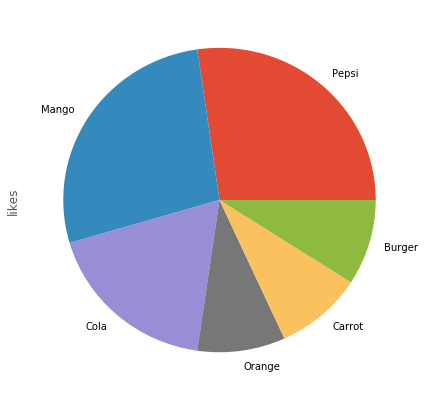

In [11]:
%matplotlib inline
import matplotlib

# ggplot is theme of matplotlib which adds
# some visual asthetics to our charts. It is
# inspired from the eponymous charting package
# of the R programming language
matplotlib.style.use('ggplot')

# Every DataFrame object exposes a plot object
# which can be used to generate different plots

# A pie chart, figsize allows us to define size of the
# plot as a tuple of (width, height) in inches
food_wise.plot.pie(figsize=(7, 7))

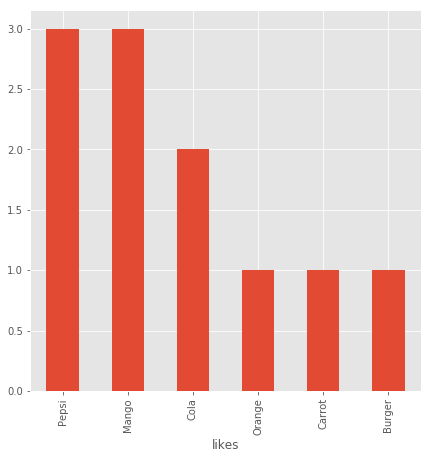

In [12]:
# A bar chart
food_wise.plot.bar(figsize=(7, 7))

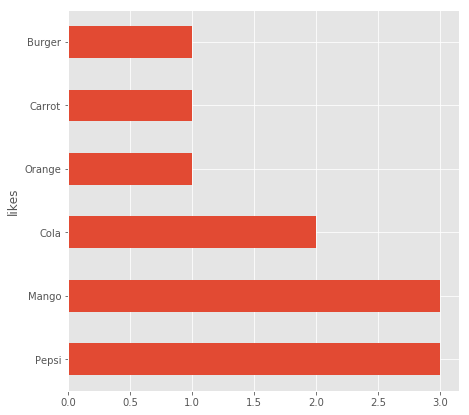

In [13]:
# Horizontal bar chart
food_wise.plot.barh(figsize=(7, 7))

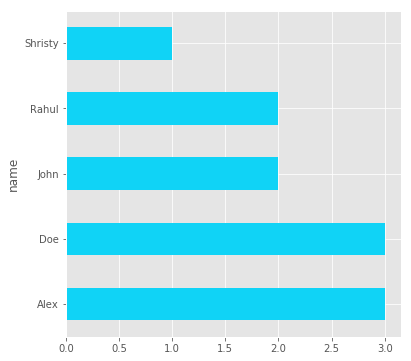

In [14]:
# Lets plot the most active users - those who hit like
# very often using the above techniques

# Get the users by number of likes they have
user_agg = users_likes_join.groupby('name')['likes'].count()

# Here we go: Our most active users in a different color
user_agg.plot.barh(figsize=(6, 6), color='#10d3f6')

matplotlib does provide many more options to generate complex and we will explore more of them as we proceed.

We assemble data and massage it with the sole purpose seeking insights, getting our questions answered - exactly where pandas shines.

### Asking questions of our data

Pandas supports boolean indexing using the square bracket notation - []. Boolean indexing enables us to pass a predicate which can be used for among other things for filtering. Pandas also provides negation operator `~` to filter based on opposite of our predicate.

In [15]:
# Users who never interact with our data
df_users[~df_users.id.isin(df_likes['user_id'])]

,age,id,name
4,23,5,Ellen


Since pandas DataFrame is a column based abstraction (as against row) we need to `reset_index` after an aggregation operation in order retrieve flat DataFrame which is convenient to query.

In [16]:
# Oldest user who has exactly 2 likes
agg_values = (
    users_likes_join
        .groupby(['user_id', 'name', 'age'])
        .agg({ 'likes': 'count' })
        .sort_index(level=['age'], sort_remaining=False, ascending=False)
)

agg_values[agg_values['likes'] == 2].head(1)

,,,likes
user_id,name,age,
1,John,29,2


In the above we used `sort_index` instead of `sort_values` because the `groupby` operation creates a `MultiIndex`
on columns `user_id`, `name` and `age` and since `age` is a part of an index `sort_values` cannot operate on it.

The `head(n)` function on a `DataFrame` returns first `n` records from the frame and the equivalent function `tail(n)` returns last `n` records from the frame.

In [17]:
# Oldest user who has at least 2 likes
agg_values[agg_values['likes'] >= 2].head(1)

,,,likes
user_id,name,age,
3,Alex,32,3


In [18]:
# Lets augment our data a little more
users = users + [
    { 'id': 7, 'name': 'Yeti', 'age': 40 },
    { 'id': 8, 'name': 'Commander', 'age': 31 },
    { 'id': 9, 'name': 'Jonnah', 'age': 26 },
    { 'id': 10, 'name': 'Hex', 'age': 28 },
    { 'id': 11, 'name': 'Sam', 'age': 33 },
    { 'id': 12, 'name': 'Madan', 'age': 53 },
    { 'id': 13, 'name': 'Harry', 'age': 38 },
    { 'id': 14, 'name': 'Tom', 'age': 29 },
    { 'id': 15, 'name': 'Daniel', 'age': 23 },
    { 'id': 16, 'name': 'Virat', 'age': 24 },
    { 'id': 17, 'name': 'Nathan', 'age': 16 },
    { 'id': 18, 'name': 'Stepheny', 'age': 26 },
    { 'id': 19, 'name': 'Lola', 'age': 31 },
    { 'id': 20, 'name': 'Amy', 'age': 25 },
]

users, len(users)

([{'age': 29, 'id': 1, 'name': 'John'},
  {'age': 19, 'id': 2, 'name': 'Doe'},
  {'age': 32, 'id': 3, 'name': 'Alex'},
  {'age': 27, 'id': 4, 'name': 'Rahul'},
  {'age': 23, 'id': 5, 'name': 'Ellen'},
  {'age': 30, 'id': 6, 'name': 'Shristy'},
  {'age': 40, 'id': 7, 'name': 'Yeti'},
  {'age': 31, 'id': 8, 'name': 'Commander'},
  {'age': 26, 'id': 9, 'name': 'Jonnah'},
  {'age': 28, 'id': 10, 'name': 'Hex'},
  {'age': 33, 'id': 11, 'name': 'Sam'},
  {'age': 53, 'id': 12, 'name': 'Madan'},
  {'age': 38, 'id': 13, 'name': 'Harry'},
  {'age': 29, 'id': 14, 'name': 'Tom'},
  {'age': 23, 'id': 15, 'name': 'Daniel'},
  {'age': 24, 'id': 16, 'name': 'Virat'},
  {'age': 16, 'id': 17, 'name': 'Nathan'},
  {'age': 26, 'id': 18, 'name': 'Stepheny'},
  {'age': 31, 'id': 19, 'name': 'Lola'},
  {'age': 25, 'id': 20, 'name': 'Amy'}],
 20)

In [19]:
likes = likes + [
    { 'user_id': 17, 'likes': 'Mango' },
    { 'user_id': 14, 'likes': 'Orange'},
    { 'user_id': 18, 'likes': 'Burger'},
    { 'user_id': 19, 'likes': 'Blueberry'},
    { 'user_id': 7, 'likes': 'Cola'},
    { 'user_id': 11, 'likes': 'Burger'},
    { 'user_id': 13, 'likes': 'Mango'},
    { 'user_id': 1, 'likes': 'Coconut'},
    { 'user_id': 6, 'likes': 'Pepsi'},
    { 'user_id': 8, 'likes': 'Cola'},
    { 'user_id': 17, 'likes': 'Mango'},
    { 'user_id': 19, 'likes': 'Coconut'},
    { 'user_id': 15, 'likes': 'Blueberry'},
    { 'user_id': 20, 'likes': 'Soda'},
    { 'user_id': 3, 'likes': 'Cola'},
    { 'user_id': 4, 'likes': 'Pepsi'},
    { 'user_id': 14, 'likes': 'Coconut'},
    { 'user_id': 11, 'likes': 'Mango'},
    { 'user_id': 12, 'likes': 'Soda'},
    { 'user_id': 16, 'likes': 'Orange'},
    { 'user_id': 2, 'likes': 'Pepsi'},
    { 'user_id': 19, 'likes': 'Cola'},
    { 'user_id': 15, 'likes': 'Carrot'},
    { 'user_id': 18, 'likes': 'Carrot'},
    { 'user_id': 14, 'likes': 'Soda'},
    { 'user_id': 13, 'likes': 'Cola'},
    { 'user_id': 9, 'likes': 'Pepsi'},
    { 'user_id': 10, 'likes': 'Blueberry'},
    { 'user_id': 7, 'likes': 'Soda'},
    { 'user_id': 12, 'likes': 'Burger'},
    { 'user_id': 6, 'likes': 'Cola'},
    { 'user_id': 4, 'likes': 'Burger'},
    { 'user_id': 14, 'likes': 'Orange'},
    { 'user_id': 18, 'likes': 'Blueberry'},
    { 'user_id': 20, 'likes': 'Cola'},
    { 'user_id': 9, 'likes': 'Soda'},
    { 'user_id': 14, 'likes': 'Pepsi'},
    { 'user_id': 6, 'likes': 'Mango'},
    { 'user_id': 3, 'likes': 'Coconut'},
]

likes, len(likes)

([{'likes': 'Mango', 'user_id': 1},
  {'likes': 'Pepsi', 'user_id': 1},
  {'likes': 'Burger', 'user_id': 2},
  {'likes': 'Mango', 'user_id': 2},
  {'likes': 'Cola', 'user_id': 3},
  {'likes': 'Orange', 'user_id': 4},
  {'likes': 'Cola', 'user_id': 3},
  {'likes': 'Pepsi', 'user_id': 2},
  {'likes': 'Carrot', 'user_id': 3},
  {'likes': 'Mango', 'user_id': 4},
  {'likes': 'Pepsi', 'user_id': 6},
  {'likes': 'Mango', 'user_id': 17},
  {'likes': 'Orange', 'user_id': 14},
  {'likes': 'Burger', 'user_id': 18},
  {'likes': 'Blueberry', 'user_id': 19},
  {'likes': 'Cola', 'user_id': 7},
  {'likes': 'Burger', 'user_id': 11},
  {'likes': 'Mango', 'user_id': 13},
  {'likes': 'Coconut', 'user_id': 1},
  {'likes': 'Pepsi', 'user_id': 6},
  {'likes': 'Cola', 'user_id': 8},
  {'likes': 'Mango', 'user_id': 17},
  {'likes': 'Coconut', 'user_id': 19},
  {'likes': 'Blueberry', 'user_id': 15},
  {'likes': 'Soda', 'user_id': 20},
  {'likes': 'Cola', 'user_id': 3},
  {'likes': 'Pepsi', 'user_id': 4},
  {'li

### Eating your own dog food

The above data has been copy-pasted and hand edited. A problem with this approach is the possibility of data containing more than one like for the same product by the same user. While we can manually check the data the approach will be tedious and untractable as the size of the data increases. Instead we employ pandas itself to indentify duplicate likes by the same person and fix the data accordingly.

In [20]:
# DataFrames from native python dictionaries
df_users = pd.DataFrame(users)
df_likes = pd.DataFrame(likes)

Lets figure out where are the duplicates

In [21]:
_duplicate_likes = (
    df_likes
        .groupby(['user_id', 'likes'])
        .agg({ 'likes': 'count' })
        
)

duplicate_likes = _duplicate_likes[_duplicate_likes['likes'] > 1]
duplicate_likes

,,likes
user_id,likes,
2,Pepsi,2
3,Cola,3
6,Pepsi,2
14,Orange,2
17,Mango,2


So there are in all 6 duplicate records. User#2 and Pepsi is recorded twice so that is 1 extra, 2 extra for User#3 and Cola and 1 extra for rest of the three pairs, which equals, 1 + 2 + 1 + 1 + 1 = 6.

In [22]:
# Now remove the duplicates
df_unq_likes = df_likes.drop_duplicates()

# The difference should be 6 since 6 records should be eliminated
len(df_unq_likes), len(df_likes)

(44, 50)

We replay our previous aggregation to verify no more duplicates indeed exist.

In [23]:
# Join the datasets
users_likes_join = df_users.merge(df_unq_likes, left_on='id', right_on='user_id')
users_likes_join.set_index('id')

# We aggregate the likes column and rename it to `Records`
unq_user_likes_group = (
    users_likes_join
        .groupby(['id', 'name', 'likes'])
        .agg({'likes': 'count'})
        .rename(columns={ 'likes': 'num_likes' })
)

# Should return empty if duplicates are removed
unq_user_likes_group[unq_user_likes_group['num_likes'] > 1]

,,,num_likes
id,name,likes,


Lets continue with asking more questions of our data and gloss over some more convenience methods exposed by Pandas for aggregation.

In [24]:
# What percent of audience likes each fruit?
likes_count = (
    users_likes_join
        .groupby('likes')
        .agg({ 'user_id': 'count' })
)

likes_count['percent'] = likes_count['user_id'] * 100 / len(df_users)
likes_count.sort_values('percent', ascending=False)

,user_id,percent
likes,,
Cola,7,35.0
Mango,7,35.0
Pepsi,6,30.0
Burger,5,25.0
Soda,5,25.0
Blueberry,4,20.0
Coconut,4,20.0
Carrot,3,15.0
Orange,3,15.0


In the above code snippet we created a computed column `percent` in the `likes_count` DataFrame. Column operations in pandas are vectorized and execute significantly faster than row operations; always a good idea to express computations as column operations as against row operations.

In [40]:
# What do people who like Coconut also like?
coconut_likers = users_likes_join[users_likes_join['likes'] == 'Coconut'].user_id
likes_among_coconut_likers = users_likes_join[(users_likes_join['user_id'].isin(coconut_likers)) & (users_likes_join['likes'] != 'Coconut')]
likes_among_coconut_likers.groupby('likes').agg({ 'user_id': pd.Series.nunique }).sort_values('user_id', ascending=False)

,user_id
likes,
Cola,2
Pepsi,2
Blueberry,1
Carrot,1
Mango,1
Orange,1
Soda,1


In our fictitious database, `Cola` and `Pepsi` seem to be popular among the users who like `Coconut`.

likes
Blueberry    Axes(0.125,0.125;0.775x0.755)
Burger       Axes(0.125,0.125;0.775x0.755)
Carrot       Axes(0.125,0.125;0.775x0.755)
Coconut      Axes(0.125,0.125;0.775x0.755)
Cola         Axes(0.125,0.125;0.775x0.755)
Mango        Axes(0.125,0.125;0.775x0.755)
Orange       Axes(0.125,0.125;0.775x0.755)
Pepsi        Axes(0.125,0.125;0.775x0.755)
Soda         Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

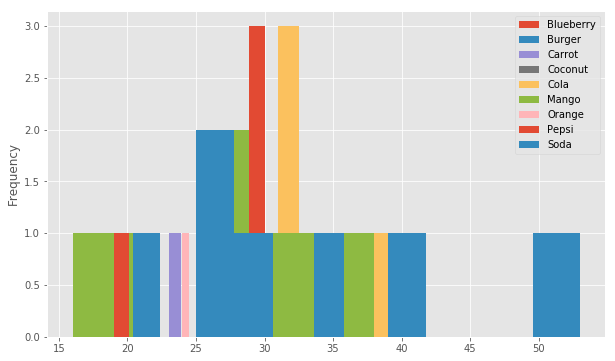

In [56]:
# What is the age group distribution of likes?
users_likes_join.groupby('likes').age.plot(kind='hist', legend=True, figsize=(10, 6))

Most of our audience seem to fall in the `25 - 40 years` age group. But this visualisation has one flaw - if records are stacked on top of each other, only one of them will be visible. Lets try an alternative plot.

likes
Blueberry    Axes(0.125,0.125;0.775x0.755)
Burger       Axes(0.125,0.125;0.775x0.755)
Carrot       Axes(0.125,0.125;0.775x0.755)
Coconut      Axes(0.125,0.125;0.775x0.755)
Cola         Axes(0.125,0.125;0.775x0.755)
Mango        Axes(0.125,0.125;0.775x0.755)
Orange       Axes(0.125,0.125;0.775x0.755)
Pepsi        Axes(0.125,0.125;0.775x0.755)
Soda         Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

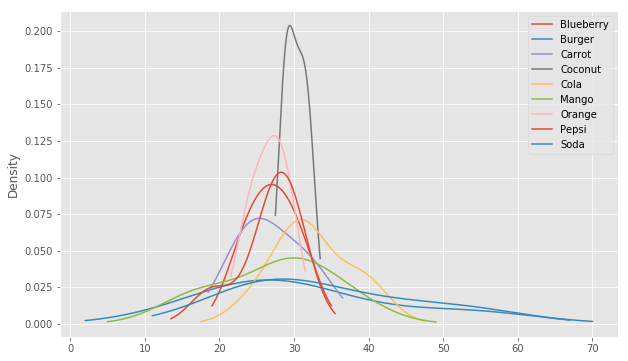

In [57]:
users_likes_join.groupby('likes').age.plot(kind='kde', legend=True, figsize=(10, 6))

Anything surprising? Coconut - gray color - was not represented in the histogram. But from this visualisation, we can notice that coconut is popular among the `25 - 35 years` age group only.

On the other hand, if we want to plot a specific "likable" object, we can simply filter our dataframe before `groupby` operation.

likes
Soda    Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

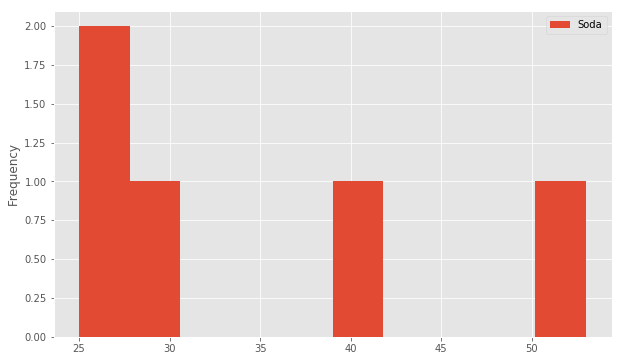

In [62]:
# Age distribution only of people who like Soda
users_likes_join[users_likes_join['likes'] == 'Soda'].groupby('likes').age.plot(kind='hist', legend=True, figsize=(10, 6))

Only two people older than 30 years like Soda and it is more popular below the age of thirty.